In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('online_shoppers_intention.csv')
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [6]:
df = df.astype({'OperatingSystems': object, 'Browser': object, 'Region': object, 'TrafficType': object, 'Weekend': object})

In [12]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 7, 7
rcParams['lines.linewidth'] = 2
rcParams['xtick.labelsize'] = 'large'
rcParams['ytick.labelsize'] = 'large'

Text(0.5, 1.0, 'Data Correlation')

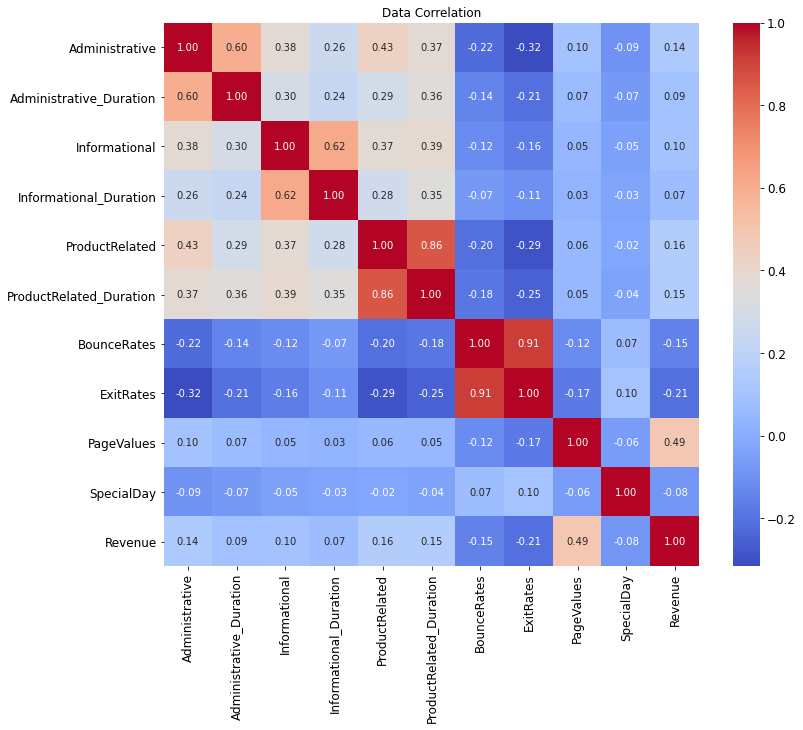

In [14]:
# mengubah tipe data Revenue
# df = df.astype({'Revenue': bool})

# numeric correlation
plt.figure(figsize=(12 , 10))
sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True, fmt = '.2f')
plt.title('Data Correlation')

Keterangan:
Label/target: Revenue
Feature yang memiliki korelasi dengan label:

PageValues: kolerasi positif (0.49)
ExitRates: korelasi negatif (-0.21)
ProductRelated: korelasi positif (0.16); mejadi tipe halaman dengan nilai korelasi paling besar
Catatan lainnya:

BounceRates dan ExitRates berkorelasi kuat (0.91), ada kemungkinan redundan
Page_type dan Page_type_duration memiliki korelasi positif yang cukup besar. Secara intuitif, semakin banyak halaman tersebut dibuka, maka akan membutuhkan durasi yang lebih lama.
Berdasarkan gambaran hasil di atas, perlu diperiksa:

Feature yang memiliki korelasi dengan feature target (Revenue)
Feture lainnya yang memiliki korelasi dengan feature (1)
Keterkaitan feature lainnya

# Category Plots

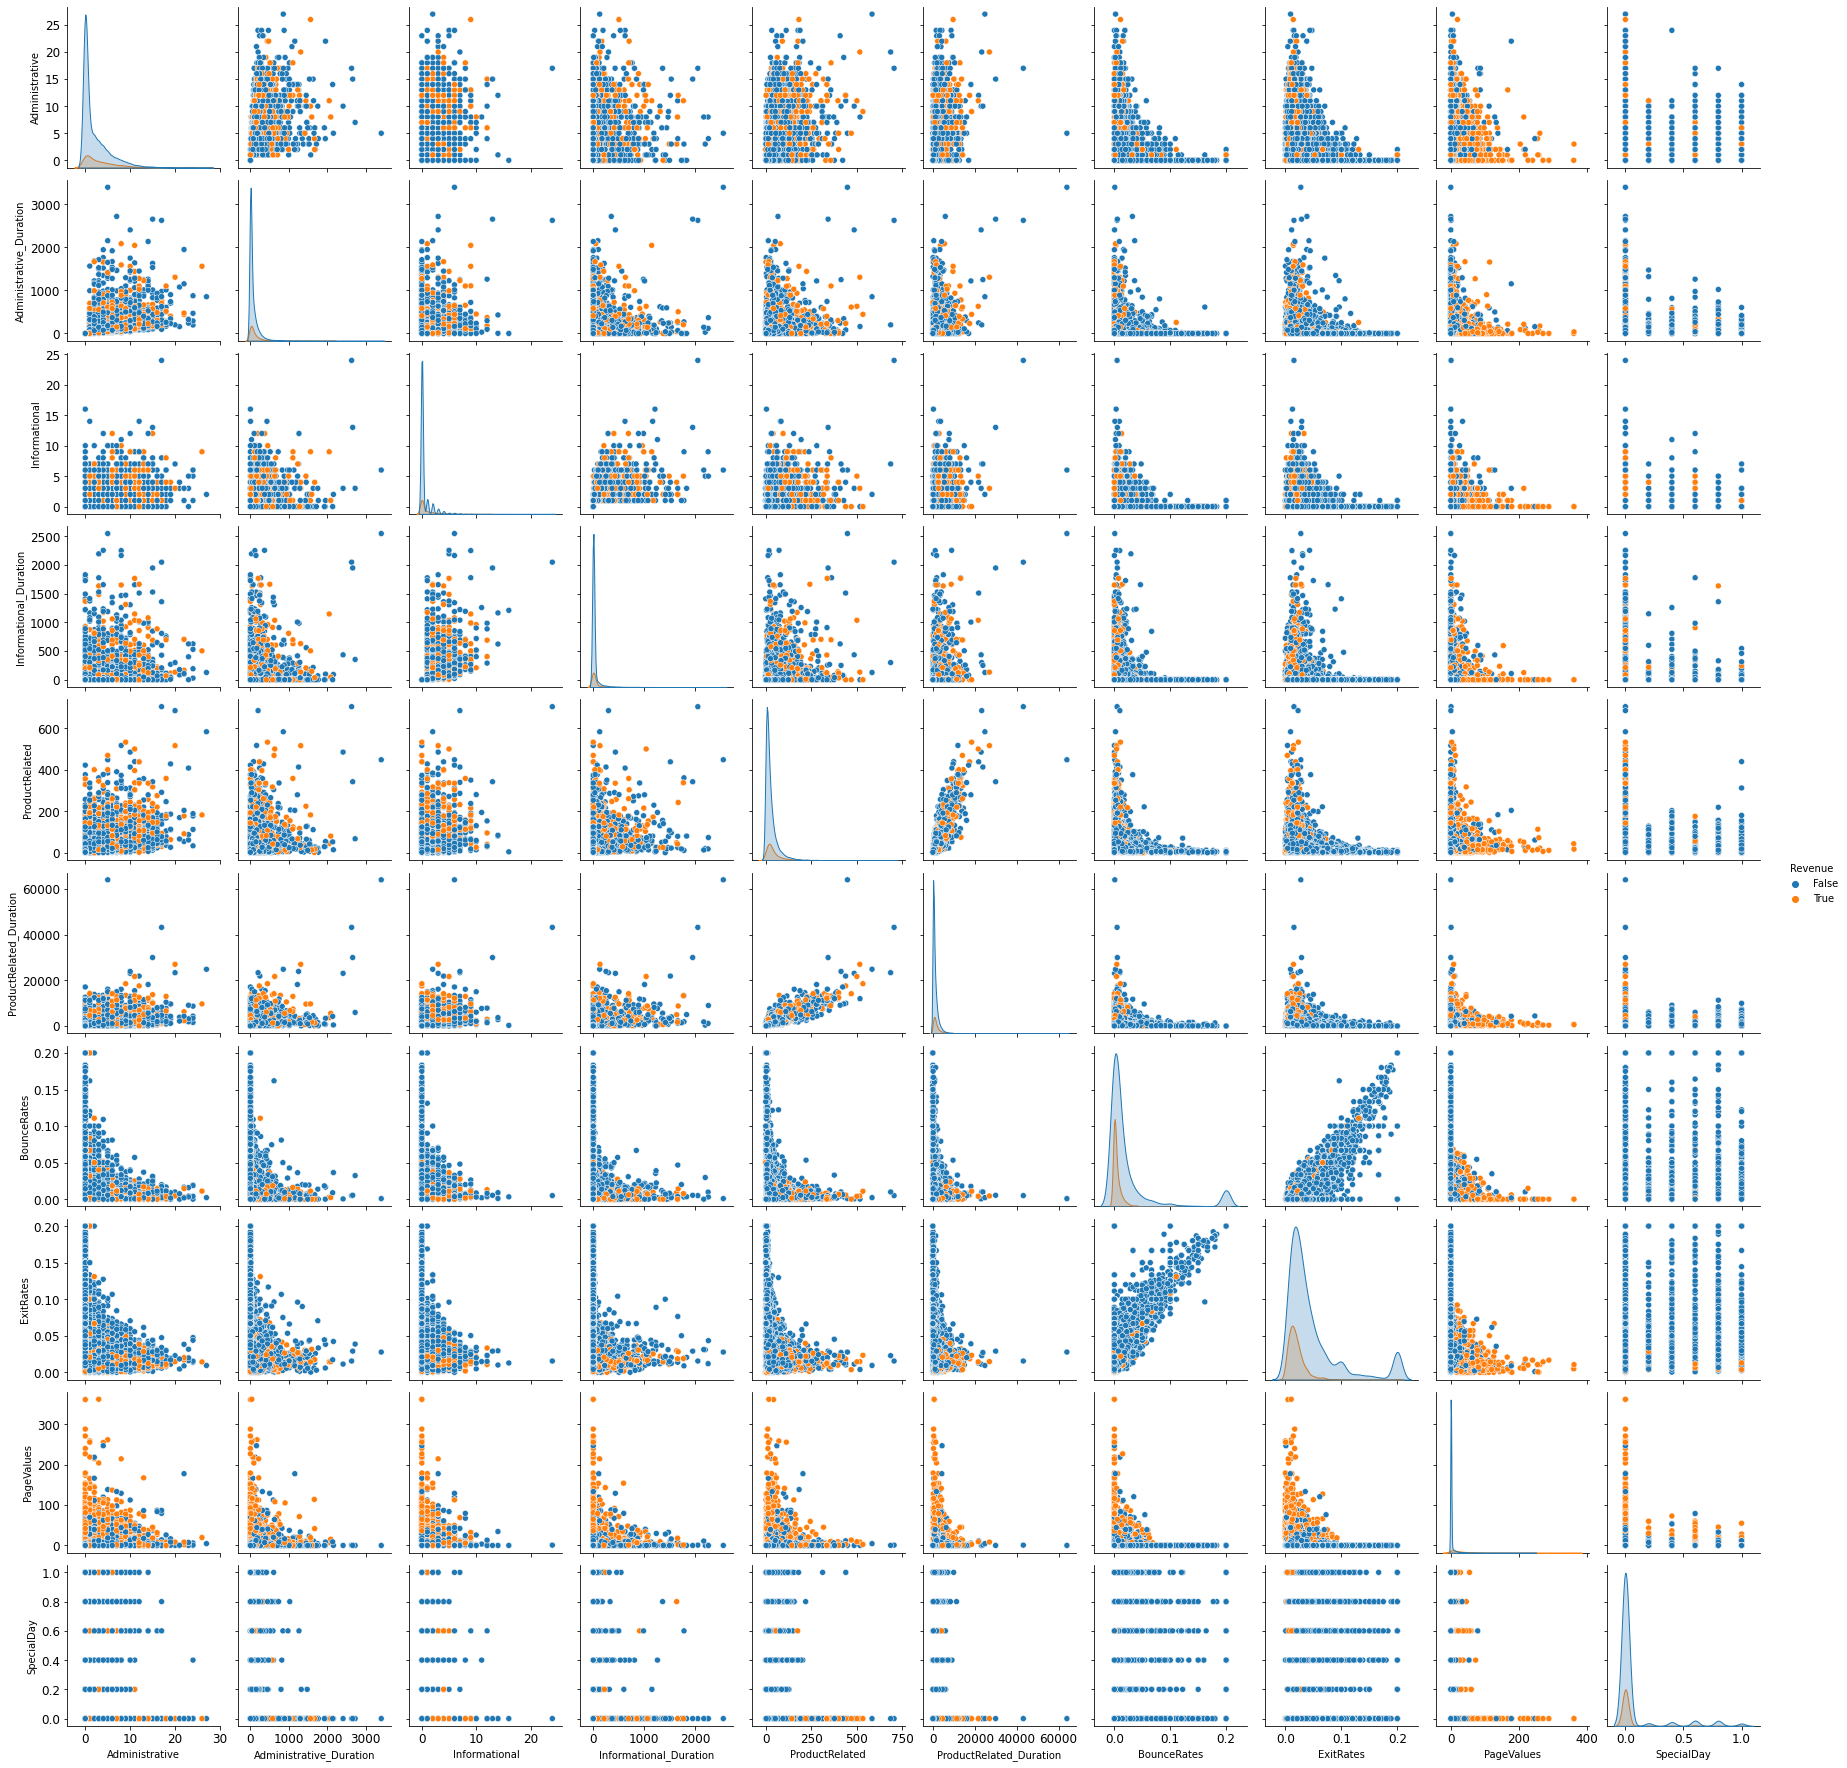

In [15]:
# pair plot dari semua feature
features = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 
            'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Revenue']

sns.pairplot(df[features], kind = 'scatter', diag_kind = 'kde', hue = 'Revenue')

Terdapat beberapa pola yang menarik:

Feature yang memiliki korelasi dengan feature target (Revenue)

PageValues: terdapat kecenderungan user akan melakukan pembelian pada nilai PageValues yang tinggi.
Exit/Bounce-Rates: terdapat kecenderungan user akan melakukan pembelian saat nilai Exit/Bounce-Rates rendah.
Tidak ada separasi nilai Revenue yang cukup jelas pada scatter plot feature lainnya.
Feature lainnya yang memiliki korelasi dengan feature (1)

Pada scatterplot antara PageValues dan Bounce/Exit-Rates dapat dilihat bahwa user yang melakukan pembelian cenderung berkumpul pada area bawah (nilai PageValues besar, dan nilai Bouce/ExitRates kecil).
Pada nilai SpecialDay 0.0 (jarak SpecialDay dengan waktu kunjungan sangat dekat), nilai PageValues cenderung besar dan user melakukan pembelian.
Feature lainnya

Tidak diperoleh relasi antara type halaman yang mengakibatkan user akan mengunjungi halaman a akibat halaman b atau semisalnya.
Tidak ada kecenderungan seseorang akan melakukan pembelian (Revenue = True) atau tidak berdasarkan tipe dan durasi halaman yang berbeda.